# Recruitment assignment
Image model deployment

The goal of the assignment is to propose and build a machine learning model for
Fashion-MINST data (available here:
https://github.com/zalandoresearch/fashion-mnist#get-the-data).

You need to select the features, use appropriate model for the task, validate the model and
comment on its fitness. Moreover, propose a model production deployment for scalable model
usage; text only deployment discussion, you don’t need to implement it.
You don’t need to create a best model available, we want to see how you approach the problem
and how you understand model building tasks.

After creating and saving a model, propose a model production deployment for scalable model
usage. Please provide text discussion and deployment validation, along with deployment files,
e.g. Dockerfile, JSON/YAML deployment definition etc., with the example usage and results;
printout of the results are sufficient.

We suggest to use Python analytical stack and create model in Keras/Tensorflow/PyTorch or
libraries that are built on these DL engines.. Submit your result as a Jupyter notebook, along
with other files used like Python files and deployment files.

Do not hesitate to contact us if you have any questions.

# Load data

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist train data and test data
(x_training, y_training), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_training shape:", x_training.shape, "y_training shape:", y_training.shape)

x_training shape: (60000, 28, 28) y_training shape: (60000,)


# Visualize data
We have gray-scale images 28x28, they are centered.

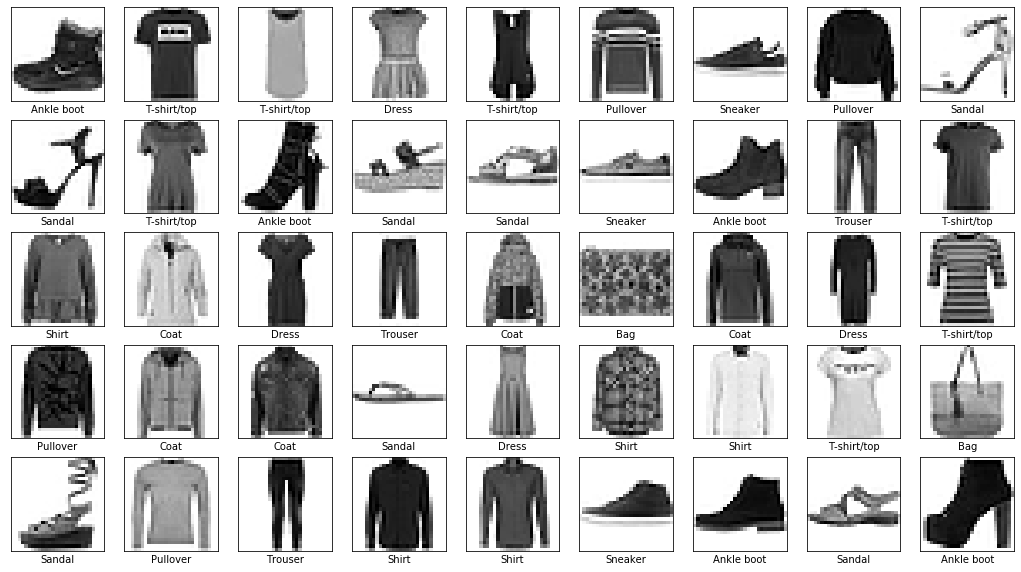

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18, 10))
for i in range(45):
    plt.subplot(5, 9, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_training[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_training[i]])

#### Missing values
Let's check if there are any missing values.

In [17]:
print(np.round(np.isnan(x_training).mean(), 3),  ' % missing values')

0.0  % missing values


# Model and feature selection

For fashion images recognition I decided to use a convolutional neural network, because:
- it is a standard model used for image recognition,
- filters and kernels colvolve on a given image to detect features like edges and shapes,
- it can detect complex spatial shapes from the spatial features at every subsequent level.

The main adventage of this model is that it selects features on its own applying chosen filters. so feature selection in this case is a part of model definition.



### CNN architecture choice

I designed 4 different CNN architectures inspiring on well known examples. I wanted to compare them and choose the best for further research.

In [5]:
from tensorflow.keras import datasets, layers, models

def model_arch_simple_net():
    model = models.Sequential()
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

def model_arch_le_net():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

def model_arch_alex_net():
    model = models.Sequential()
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

def model_arch_vvg_16():
    model = models.Sequential()
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.Conv2D(16, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

I divided training data on `x_train` and `x_val` in proportion 90% - 10% and used them for models evaluation.

In [6]:
from sklearn.model_selection import train_test_split

# Normalize data
x_train = x_training / 255.
y_train = y_training

# Shape adjustment
x_train.shape = (60000, 28, 28, 1)

# Extraction of validation set from training set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, shuffle=True, test_size=0.1, random_state=8465)

# Designed models
model_archs = [{'name': 'simple-net', 'model': model_arch_simple_net()}, 
               {'name': 'le-net', 'model': model_arch_le_net()},
               {'name': 'alexnet', 'model': model_arch_alex_net()}, 
               {'name': 'vvg16', 'model': model_arch_vvg_16()}]

for m in model_archs:
    print(m['name'])
    m['model'].summary()

simple-net
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)      

### Evaluation of proposed architectures
I ran each of the models for 10 epochs and measured accuracy and loss for each run.

In [20]:
# Models evaluation
for m in model_archs:
    print(m['name'])
    print('-------------------------------------------------------------')

    m['model'].compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

    m['model'].fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=0)
    m['model'].evaluate(x_train, y_train)
    m['model'].evaluate(x_val, y_val)
    print()

simple-net
-------------------------------------------------------------
6000/6000 [==============================] - 1s 136us/sample - loss: 0.4206 - acc: 0.9023

le-net
-------------------------------------------------------------
6000/6000 [==============================] - 1s 158us/sample - loss: 0.3107 - acc: 0.8913

alexnet
-------------------------------------------------------------
6000/6000 [==============================] - 1s 142us/sample - loss: 0.2699 - acc: 0.9008

vvg16
-------------------------------------------------------------
6000/6000 [==============================] - 1s 204us/sample - loss: 0.2871 - acc: 0.9068



On the plots we can see training and validation results of 4 proposed models. *loss* and *acc* illustrate training measurements, *val_loss* and *val_acc* validation outcomes.
<img src="images/loss.png"/>
<img src="images/val_los.png"/>
<img src="images/acc.png"/>
<img src="images/val_acc.png"/>

Based on this measurements I decided to further develop model inspired vvg-16.

The train loss in the model is very low as compared to the validation set loss which tells us that the model has over-fit. Therefore I needed to tune the hyper-parameters such that we get a low loss and yet don’t over-fit. For this I useed Hyperas.

## Hyper-parameters tuning
I decided to expand the model of Dropout layers, which should help me decrease over-fitting, and some batch normalisation layers helping model to learn faster.

I wanted to test a few parameters:
- different filter numbers, so I chose 3 different sets of filters `f`,
- single filter size, it could be set to 3x3 or 5x5,
- dropout layers rate, which was chosen according to uniform distribution,
- size of Dense layer, I propose 3 posibilities 64, 84, 128,
- batch size, I proposed 3 options.

I ran hyperas optimizer for 30 runs.

In [ ]:
def model(X_train, Y_train, X_test, Y_test):
    model = models.Sequential()
    f = {{choice([[16, 16, 32, 32, 32], [32, 32, 64, 64, 64], [16, 32, 32, 64, 64]])}}
    model.add(layers.Conv2D(f[0], {{choice([(3, 3), (5, 5)])}}, padding='same', activation='relu', 
                            input_shape=(28, 28, 1)))
    model.add(layers.Conv2D(f[1], {{choice([(3, 3), (5, 5)])}}, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout({{uniform(0, 1)}}, seed=7382))
    model.add(layers.Conv2D(f[2], {{choice([(3, 3), (5, 5)])}}, padding='same', activation='relu'))
    model.add(layers.Conv2D(f[3], {{choice([(3, 3), (5, 5)])}}, padding='same', activation='relu'))
    model.add(layers.Conv2D(f[4], {{choice([(3, 3), (5, 5)])}}, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout({{uniform(0, 1)}}, seed=7382))

    model.add(layers.Flatten())
    model.add(layers.Dense({{choice([64, 84, 128])}}, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout({{uniform(0, 1)}}))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, Y_train,
              batch_size={{choice([None, 64, 128])}},
              epochs=10,
              verbose=2,
              validation_data=(X_test, Y_test),
              callbacks=[WandbCallback()])

    score, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test accuracy:', acc)
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}


def data():
    (train_images, train_labels), _ = tf.keras.datasets.fashion_mnist.load_data()
    train_images = train_images / 255.

    train_images.shape = (60000, 28, 28, 1)
    X_train, X_test, Y_train, Y_test = train_test_split(train_images, 
                                                        train_labels, 
                                                        shuffle=True, 
                                                        test_size=0.1, 
                                                        random_state=8465)
    return X_train, Y_train, X_test, Y_test


if __name__ == '__main__':
    best_run, best_model = optim.minimize(model=model,
                                          data=data,
                                          algo=tpe.suggest,
                                          max_evals=30,
                                          trials=Trials())
    X_train, Y_train, X_test, Y_test = data()
    print("Evalutation of best performing model:")
    print(best_model.evaluate(X_test, Y_test))

    print(best_run)

In [1]:
file = open("files/Hyperas-search-space.txt", "r") 
for line in file: 
    print(line, end="")

>>> Hyperas search space:

def get_space():
    return {
        'f': hp.choice('f', [[16, 16, 32, 32, 32], [32, 32, 64, 64, 64], [16, 32, 32, 64, 64]]),
        'f_1': hp.choice('f_1', [(3, 3), (5, 5)]),
        'f_2': hp.choice('f_2', [(3, 3), (5, 5)]),
        'Dropout': hp.uniform('Dropout', 0, 1),
        'Dropout_1': hp.choice('Dropout_1', [(3, 3), (5, 5)]),
        'Dropout_2': hp.choice('Dropout_2', [(3, 3), (5, 5)]),
        'Dropout_3': hp.choice('Dropout_3', [(3, 3), (5, 5)]),
        'Dropout_4': hp.uniform('Dropout_4', 0, 1),
        'Dense': hp.choice('Dense', [64, 84, 128]),
        'Dropout_5': hp.uniform('Dropout_5', 0, 1),
        'batch_size': hp.choice('batch_size', [None, 64, 128]),
    }

>>> Data
  1: 
  2: (train_images, train_labels), _ = tf.keras.datasets.fashion_mnist.load_data()
  3: train_images = train_images / 255.
  4: 
  5: 
  6: train_images.shape = (60000, 28, 28, 1)
  7: X_train, X_test, Y_train, Y_test = train_test_split(train_images, train_labels, 

Above dictionary represents set of the values which hyperas found to be the best for my model training. I used them for finall model setup.
### Epochs number
Base on the values chosen by Hyperas. I created almost final model. The last thing I wanted to check was optimal number of epochs for learning. Until now I was applying 10 epochs for each run. This time I decided to try 30 epochs but with `val_loss` monitoring. If `val_loss` stops improving the algorithm will end.

In [5]:
from numpy.random import seed
seed(8465)
import tensorflow as tf
tf.random.set_seed(8465)

from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models

def data():
    x_train = x_training / 255.
    y_train = y_training

    x_train.shape = (60000, 28, 28, 1)
    X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, shuffle=True, test_size=0.1)
    return X_train, Y_train, X_test, Y_test


def model(X_train, Y_train, X_test, Y_test):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.Conv2D(32, (5, 5), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.06453230146474814))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.24188837520127948))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5569212247466263))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            # Stop training when `val_loss` is no longer improving
            monitor='val_loss',
            # "no longer improving" being defined as "no better than 1e-2 less"
            min_delta=1e-2,
            # "no longer improving" being further defined as "for at least 2 epochs"
            patience=3,
            verbose=1)
    ]
    model.fit(X_train, Y_train,
              batch_size=64,
                  epochs=30,
         validation_data=(X_test, Y_test),
               callbacks=callbacks)

    validation_loss, validation_acc = model.evaluate(X_test, Y_test)
    
    
X_train, Y_train, X_test, Y_test = data()
model(X_train, Y_train, X_test, Y_test)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 180s 3ms/sample - loss: 0.5397 - accuracy: 0.8115 - val_loss: 0.3277 - val_accuracy: 0.8775
Epoch 2/30
54000/54000 [==============================] - 181s 3ms/sample - loss: 0.3313 - accuracy: 0.8820 - val_loss: 0.2541 - val_accuracy: 0.9112
Epoch 3/30
54000/54000 [==============================] - 182s 3ms/sample - loss: 0.2835 - accuracy: 0.8999 - val_loss: 0.2339 - val_accuracy: 0.9153
Epoch 4/30
54000/54000 [==============================] - 182s 3ms/sample - loss: 0.2547 - accuracy: 0.9089 - val_loss: 0.2900 - val_accuracy: 0.8862
Epoch 5/30
54000/54000 [==============================] - 185s 3ms/sample - loss: 0.2362 - accuracy: 0.9166 - val_loss: 0.2237 - val_accuracy: 0.9243
Epoch 6/30
54000/54000 [==============================] - 185s 3ms/sample - loss: 0.2181 - accuracy: 0.9213

After analysing results of each epoch I decided to run model for 9 epochs. In this epoch results on traing and validation sets were comparable.
### Final results

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Seed seting
from numpy.random import seed
seed(8465)
import tensorflow as tf
tf.random.set_seed(8465)
from keras.backend import manual_variable_initialization 
manual_variable_initialization(True)
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import os

EPOCHS = 9
BATCH_SIZE = 64

def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.Conv2D(32, (5, 5), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.06453230146474814))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.24188837520127948))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5569212247466263))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    return model

In [9]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)


# Load test data
_, (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
test_images = test_images / 255.
test_images.shape = (10000, 28, 28, 1)

# Create a basic model instance
model = create_model()

# Evaluate the model
loss_untrained, acc_untrained = model.evaluate(test_images, test_labels, verbose=0)
print("Untrained model, accuracy: {:5.2f}%, loss: {:5.2f}".format(100 * acc_untrained, loss_untrained))

# Recreate the exact same model purely from the file
model = keras.models.load_model('../training/model.h5')

# Re-evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=0)
print("Trained model, accuracy: {:5.2f}%, loss: {:5.2f}".format(100 * acc, loss))

Untrained model, accuracy: 14.55%, loss:  2.30
Trained model, accuracy: 92.69%, loss:  0.21


I think that 92.69% accuracy is not a bad result. The accuracy and loss values are very similar on train and test sets, so model is not over-fitted.

# Deployment strategy
Simple and scalable solution can be usage of REST API. We deploy trained model and clients can request for answers for data via REST API and post method. Neural networks are optimized for a big number of inputs so we could process  data in batches.

<img src="images/architecture_diagram.png"/>

# Deployment validation
My model has a seed set at the beginning so it's results are reproducible.

There is many things which can be done for deployment validation:
- Unit tests for REST API validation.
- Integration tests for full pipeline.
- Model quality validation before serving:
    - comparison of quality with the previous version, 
    - comparison of quality with a treshold.
- Test that model weights and outputs are numerically stable:
    - check for NaN and Inf values of the weights and layer outputs,
    - test that more than half of the outputs of a layer are not zero.
- Test the training steps per second for a new model version against the previous version and against a fixed threshold.
### Monitoring
- Track the time since the model was retrained on new data and set a threshold age for alerts, to not to see a decline in model quality.
- Monitor the model's age throughout the pipeline to catch pipeline stalls.
- Track model performance by versions of code, model, and data.





Monitor Model Performance
Your unicorn appearance predictor has been more popular than expected! You’re getting lots of prediction requests and even more training data. You think that's great until you realize that your model is taking more and more memory and time to train. You decide to monitor your model's performance by following these steps:

Track model performance by versions of code, model, and data. Such tracking lets you pinpoint the exact cause for any performance degradation.
Test the training steps per second for a new model version against the previous version and against a fixed threshold.

Catch memory leaks by setting a threshold for memory use.
Monitor API response times and track their percentiles. While API response times might be outside your control, slow responses could potentially cause poor real-world metrics.
Monitor the number of queries answered per second.

Test Quality of Live Model on Served Data
You’ve validated your model. But what if real-world scenarios, such as unicorn behavior, change after recording your validation data? Then the quality of your served model will degrade. However, testing quality in serving is hard because real-world data is not always labelled. If your serving data is not labelled, consider these tests:

Generate labels using human raters.

Investigate models that show significant statistical bias in predictions. See Classification: Prediction Bias.

Track real-world metrics for your model. For example, if you’re classifying spam, compare your predictions to user-reported spam.

Mitigate potential divergence between training and serving data by serving a new model version on a fraction of your queries. As your validate your new serving model, gradually switch all queries to the new version.

Using these tests, remember to monitor both sudden and slow degradation in prediction quality.


7. example usage of deployment

8. deployment results, printout of the results are sufficient

Dockerfile, JSON/YAML deployment definition etc.